# **REVERSÃO DA DIFERENCIAÇÃO NAS PREVISÕES**

In [1]:
import numpy as np
import pandas as pd

In [2]:
##### Abertura do arquivo de Séries Temporais Air Passengers
dados = pd.read_csv('AirPassengers.csv',
                    sep=',')

## quantidades de passageiros mensais em um avião. 

In [3]:
###### Leitura do arquivo Air Passengers
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
serie_num = pd.Series(dados['#Passengers'].values)
serie_num

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Length: 144, dtype: int64

In [7]:
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie #dados em séries

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

**ESTACIONARIDADE**

In [8]:
import matplotlib.pyplot as plt

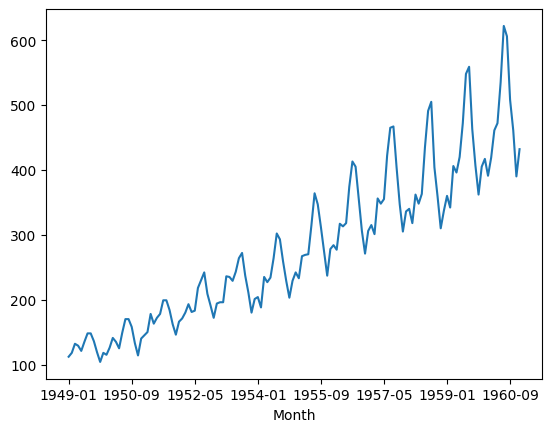

In [9]:
serie.plot()
plt.show()


### a série tem tendência crescente ao passar dos anos, e não estacionária. 



In [10]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionária:  **estatística do teste > valor crítico**.

Ho = é estacionária: **estatística do teste < valor crítico**


In [11]:
kpss = statsmodels.tsa.stattools.kpss(serie)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))


    
valor_critico = kpss[3]['5%']
if kpss[0] > kpss[3]['5%']:
    print(f'Ha = não é estacionário: estatística do teste {kpss[0]} > valor crítico {valor_critico}')
elif kpss[0] < kpss[3]['5%']:
    print(f'Ho = é estacionário:  estatística do teste {kpss[0]}  < valor crítico {valor_critico}')
print()    
    

Estatítica do teste: 1.6513
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Ha = não é estacionário: estatística do teste 1.6513122354165206 > valor crítico 0.463



/tmp/ipykernel_8389/125554488.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie)


**DIFERENCIAÇÃO**

valores de diferenciação se alteram, diferenciação => valor posterior menos o valor anterior.

In [12]:
serie_diferenciada = serie.diff()
serie_diferenciada

Month
1949-01     NaN
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 144, dtype: float64

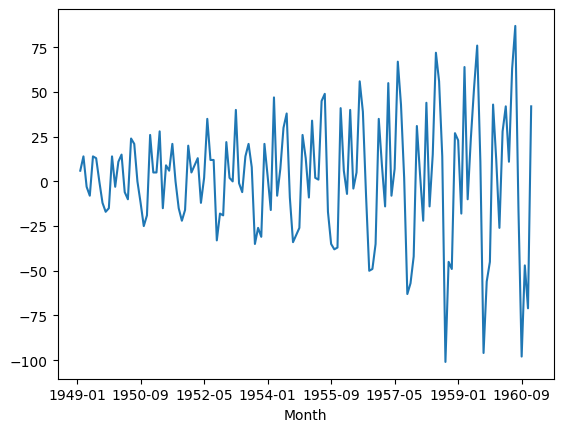

In [16]:
serie_diferenciada.plot()
plt.show()

ficou simétrica, tendendo a ser estacionária.


Deu erro, por conta dos dados em NaN


kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)

print('Estatítica do teste: {:.4f}'.format(kpss[0]))

print('p_valor: {:.4f}'.format(kpss[1]))

print('Valores Críticos:')

for chave, valor in kpss[3].items():
    
   print('{}: {:.4f}'.format(chave, valor))




In [23]:
serie_diferenciada = serie_diferenciada.drop(index = serie_diferenciada.index[0]) #excluir o primeiro valor

In [24]:
serie_diferenciada

Month
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
1949-06    14.0
1949-07    13.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 142, dtype: float64

In [26]:
kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

   
valor_critico = kpss[3]['5%']
if kpss[0] > kpss[3]['5%']:
    print(f'Ha = não é estacionário: estatística do teste {kpss[0]} > valor crítico {valor_critico}')
elif kpss[0] < kpss[3]['5%']:
    print(f'Ho = é estacionário:  estatística do teste {kpss[0]}  < valor crítico {valor_critico}')
print()    

Estatítica do teste: 0.0242
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Ho = é estacionário:  estatística do teste 0.02419382862398609  < valor crítico 0.463



/tmp/ipykernel_8389/2978334391.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)


## **REVERSÃO DA DIFERENCIAÇÃO**

**Criando o modelo**

In [28]:
# pip install pmdarima

In [27]:
from pmdarima.arima import auto_arima

m = Período para diferenciação sazonal, período em cada estação.

m = 4 para dados trimestrais;

m = 12 para dados mensais;

m = 1 para dados anuais;

m = 5 dias úteis da semana;

m = 7 semanal; https://alkaline-ml.com/pmdarima/tips_and_tricks.html#period

In [29]:
modelo_auto = auto_arima(serie_diferenciada, trace = True, stepwise = False, seasonal=True, max_p=8, max_q=8,
                          max_P=3, max_Q=3, start_p=0, start_q=0, start_P=0, start_Q=0, m=6)

 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=1406.392, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[6] intercept   : AIC=1408.047, Time=0.05 sec
 ARIMA(0,0,0)(0,0,2)[6] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,3)[6] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(1,0,0)[6] intercept   : AIC=1407.388, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[6] intercept   : AIC=1351.928, Time=0.06 sec
 ARIMA(0,0,0)(1,0,2)[6] intercept   : AIC=1268.967, Time=0.24 sec
 ARIMA(0,0,0)(1,0,3)[6] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(2,0,0)[6] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(2,0,1)[6] intercept   : AIC=1149.702, Time=0.19 sec
 ARIMA(0,0,0)(2,0,2)[6] intercept   : AIC=1149.858, Time=0.23 sec
 ARIMA(0,0,0)(2,0,3)[6] intercept   : AIC=1151.742, Time=0.47 sec
 ARIMA(0,0,0)(3,0,0)[6] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(3,0,1)[6] intercept   : AIC=1151.328, Time=1.37 sec
 ARIMA(0,0,0)(3,0,2)[6] intercept   : AIC=1151.811, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[6] intercept  

In [30]:
resultado_auto = modelo_auto.fit(serie_diferenciada)
print(resultado_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  142
Model:             SARIMAX(0, 0, 3)x(2, 0, [], 6)   Log Likelihood                -562.383
Date:                            Sat, 09 Nov 2024   AIC                           1138.766
Time:                                    15:53:26   BIC                           1159.456
Sample:                                03-01-1949   HQIC                          1147.173
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1215      0.455      0.267      0.789      -0.771       1.014
ma.L1         -0.3341      0.076   

In [32]:
modelo_auto

ARIMA(order=(0, 0, 3), scoring_args={}, seasonal_order=(2, 0, 0, 6),
      suppress_warnings=True)

In [31]:
previsao_auto = resultado_auto.predict(n_periods=24)
previsao_auto

1961-01-01     9.762888
1961-02-01   -18.401859
1961-03-01    31.026422
1961-04-01    40.766039
1961-05-01    11.531309
1961-06-01    59.622332
1961-07-01    82.917863
1961-08-01   -14.888974
1961-09-01   -93.690877
1961-10-01   -45.207441
1961-11-01   -67.701951
1961-12-01    39.376673
1962-01-01     8.346503
1962-02-01   -17.224067
1962-03-01    30.915054
1962-04-01    39.566539
1962-05-01    11.994747
1962-06-01    56.437111
1962-07-01    79.045455
1962-08-01   -13.845353
1962-09-01   -89.582211
1962-10-01   -43.483245
1962-11-01   -64.564473
1962-12-01    36.917771
Freq: MS, dtype: float64

**Reversão**

In [36]:
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

In [35]:
serie[len(serie)-1]

/tmp/ipykernel_8389/544894886.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  serie[len(serie)-1]


432

In [37]:
previsao_auto[0]

/tmp/ipykernel_8389/4107624076.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  previsao_auto[0]


9.762888276918774


diferenciação = subtrair o valor com o anterior

reversão

somar o valor com o anterior

In [38]:
# Usando o último elemento da série não diferenciada e somando com o primeiro elemento da previsão
s = serie[len(serie)-1]+previsao_auto[0]
s

/tmp/ipykernel_8389/3327512180.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s = serie[len(serie)-1]+previsao_auto[0]


441.7628882769188

In [39]:
c = 1   # contador
previsao_revertida = [s]   # lista para incluir resultados da previsão revertida
while c < len(previsao_auto): #contagem irá de 1 até uma unidade menor que a quantidade total de previsões
    s = s + previsao_auto[c]  #somando o último valor de s com o próximo valor da previsão | começa da linha 1 da previsão
    previsao_revertida.append(s)        #incluindo resultados na lista da previsão revertida
    c = c + 1

/tmp/ipykernel_8389/1541713701.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s = s + previsao_auto[c]  #somando o último valor de s com o próximo valor da previsão | começa da linha 1 da previsão


In [40]:
previsao_revertida = pd.DataFrame(previsao_revertida)
previsao_revertida

,0
0,441.762888
1,423.361030
2,454.387452
3,495.153491
4,506.684800
5,566.307131
6,649.224994
7,634.336021
8,540.645144
9,495.437702


JUNTANDO A SÉRIE COM A PREVISÃO REVERTIDA NA ESCALA CORRETA DA SÉRIE

In [41]:
seriecomprevisao = pd.concat([serie, previsao_revertida], axis=0,ignore_index=True) # no ignore_index = False, mantém as datas, mas na previsão revertida está sem datas.
seriecomprevisao

,0
0,112.000000
1,118.000000
2,132.000000
3,129.000000
4,121.000000
...,...
163,662.348413
164,572.766203
165,529.282958
166,464.718485


In [44]:
indice = pd.date_range('1961', periods = len(previsao_revertida), freq = 'M') #lista das datas mês a mês que começa no ano de 1985
indice

/tmp/ipykernel_8389/4160975794.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  indice = pd.date_range('1961', periods = len(previsao_revertida), freq = 'M') #lista das datas mês a mês que começa no ano de 1985


DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31', '1961-11-30', '1961-12-31',
               '1962-01-31', '1962-02-28', '1962-03-31', '1962-04-30',
               '1962-05-31', '1962-06-30', '1962-07-31', '1962-08-31',
               '1962-09-30', '1962-10-31', '1962-11-30', '1962-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [47]:
previsao_revertida_index = pd.DataFrame(previsao_revertida.values, index = indice)
previsao_revertida_index

,0
1961-01-31,441.762888
1961-02-28,423.361030
1961-03-31,454.387452
1961-04-30,495.153491
1961-05-31,506.684800
1961-06-30,566.307131
1961-07-31,649.224994
1961-08-31,634.336021
1961-09-30,540.645144
1961-10-31,495.437702


In [48]:
seriecomprevisao_index = pd.concat([serie, previsao_revertida_index], axis=0,ignore_index=False) # no ignore_index = False, mantém as datas, mas na previsão revertida está sem datas.
seriecomprevisao_index


,0
1949-01,112.000000
1949-02,118.000000
1949-03,132.000000
1949-04,129.000000
1949-05,121.000000
...,...
1962-08-31 00:00:00,662.348413
1962-09-30 00:00:00,572.766203
1962-10-31 00:00:00,529.282958
1962-11-30 00:00:00,464.718485


In [57]:
print(seriecomprevisao_index.columns)

Index([0], dtype='int64')


In [60]:
# Converter o índice para datetime, se ainda não estiver no formato datetime
seriecomprevisao_index.index = pd.to_datetime(seriecomprevisao_index.index)

# Ajustar o índice para o formato de período mensal 'YYYY-MM'
seriecomprevisao_index.index = seriecomprevisao_index.index.to_period('M')

In [61]:
seriecomprevisao_index

,0
1949-01,112.000000
1949-02,118.000000
1949-03,132.000000
1949-04,129.000000
1949-05,121.000000
...,...
1962-08,662.348413
1962-09,572.766203
1962-10,529.282958
1962-11,464.718485


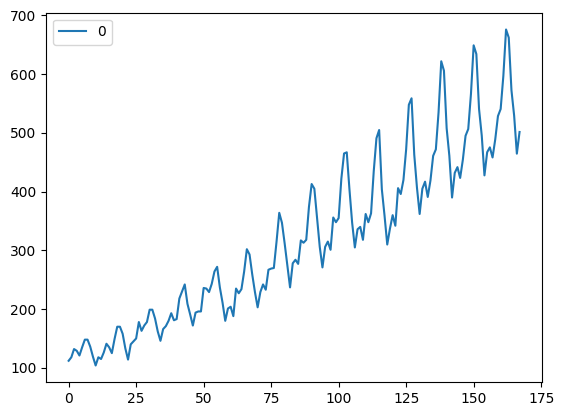

In [62]:
seriecomprevisao.plot()
plt.show()

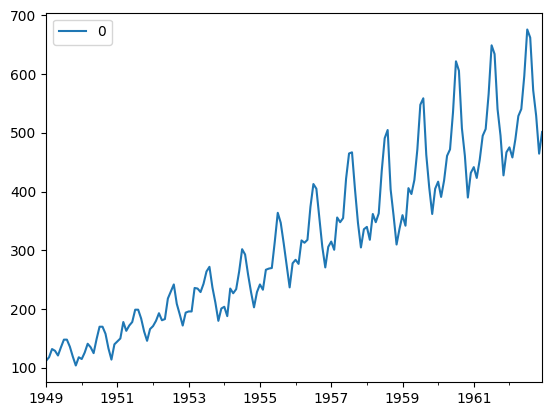

In [63]:
seriecomprevisao_index.plot()
plt.show()

## Criação de indices, para ajustar os dados de forma sequencial 

In [65]:
previsao_revertida.index = range(144, len(previsao_revertida) + 144)
previsao_revertida

,0
144,441.762888
145,423.361030
146,454.387452
147,495.153491
148,506.684800
149,566.307131
150,649.224994
151,634.336021
152,540.645144
153,495.437702


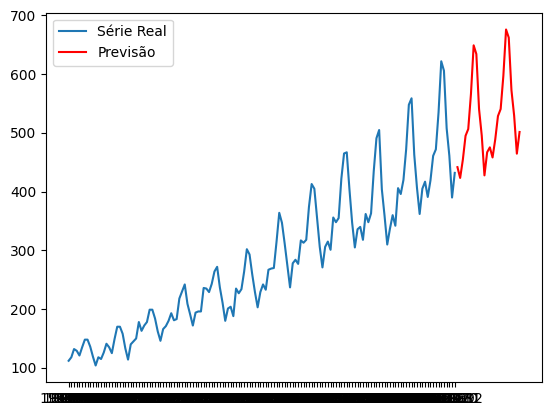

In [66]:
plt.plot(serie, label='Série Real')
plt.plot(previsao_revertida,color='red', label='Previsão')
plt.legend(loc='best')
plt.show()

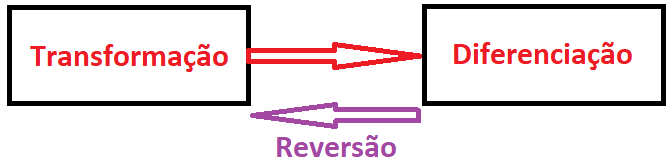

In [67]:
previsao_revertida_index

,0
1961-01-31,441.762888
1961-02-28,423.361030
1961-03-31,454.387452
1961-04-30,495.153491
1961-05-31,506.684800
1961-06-30,566.307131
1961-07-31,649.224994
1961-08-31,634.336021
1961-09-30,540.645144
1961-10-31,495.437702


In [68]:
# Converter o índice para datetime, se ainda não estiver no formato datetime
previsao_revertida_index.index = pd.to_datetime(previsao_revertida_index.index)

# Ajustar o índice para o formato de período mensal 'YYYY-MM'
previsao_revertida_index.index = previsao_revertida_index.index.to_period('M')
previsao_revertida_index

,0
1961-01,441.762888
1961-02,423.361030
1961-03,454.387452
1961-04,495.153491
1961-05,506.684800
1961-06,566.307131
1961-07,649.224994
1961-08,634.336021
1961-09,540.645144
1961-10,495.437702


                     0
1961-01-01  441.762888
1961-02-01  423.361030
1961-03-01  454.387452
1961-04-01  495.153491
1961-05-01  506.684800
1961-06-01  566.307131
1961-07-01  649.224994
1961-08-01  634.336021
1961-09-01  540.645144
1961-10-01  495.437702
1961-11-01  427.735752
1961-12-01  467.112425
1962-01-01  475.458928
1962-02-01  458.234861
1962-03-01  489.149915
1962-04-01  528.716454
1962-05-01  540.711201
1962-06-01  597.148312
1962-07-01  676.193766
1962-08-01  662.348413
1962-09-01  572.766203
1962-10-01  529.282958
1962-11-01  464.718485
1962-12-01  501.636256


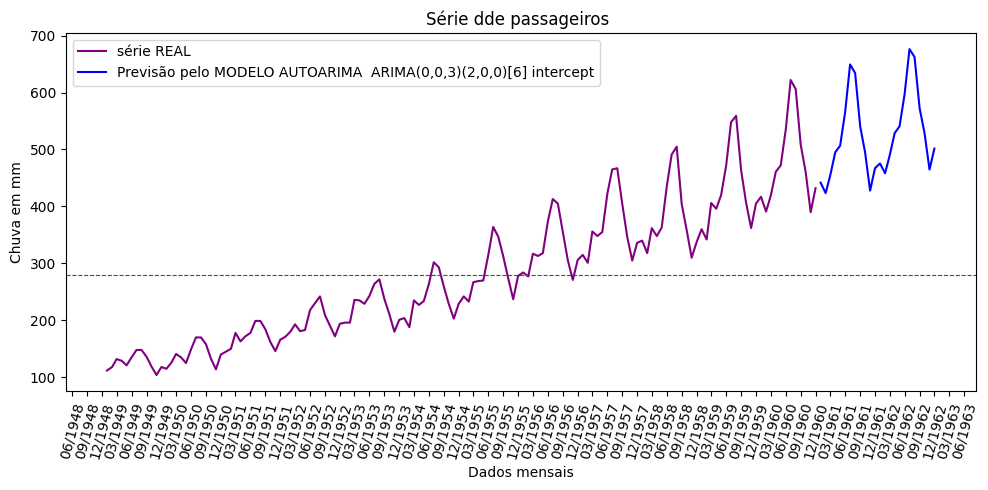

In [77]:

import matplotlib.dates as mdates


# Certificando-se de que o índice é uma série temporal (caso não esteja), formatando a data
if not pd.api.types.is_datetime64_any_dtype(serie.index):
    serie.index = pd.to_datetime(serie.index, format='%Y-%m')  # Converte para ano-mês

#if not pd.api.types.is_datetime64_any_dtype( previsao_revertida_index.index):
#    previsao_revertida_index.index = pd.to_datetime(previsao_revertida_index.index, format='%Y-%m')  # Converte para ano-mês

# Certifique-se de que o índice está no formato timestamp antes de tentar formatá-lo como ano-mês
if isinstance(previsao_revertida_index.index, pd.PeriodIndex):
    previsao_revertida_index.index = previsao_revertida_index.index.to_timestamp()  # Converte para timestamps

# Agora podemos formatar o índice no formato 'ano-mês'
previsao_revertida_index.index = pd.to_datetime(previsao_revertida_index.index, format='%Y-%m')

# Exibir o DataFrame para verificar
print(previsao_revertida_index)

# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))


# série e previsão
plt.plot((serie).index,  (serie).values, label='série REAL ', color='purple')
plt.plot(previsao_revertida_index.index, previsao_revertida_index.values ,color='blue', label=f'Previsão pelo MODELO AUTOARIMA {str(modelo_auto)}')

# Adicionando um título ao gráfico
plt.title("Série dde passageiros ")

# Definindo rótulos dos eixos
plt.xlabel("Dados mensais")
plt.ylabel("Chuva em mm")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=75)


# Formatando o eixo x para mostrar a cada meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Colocar um marcador a cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Formatando para exibir ano e mês

plt.axhline((serie.mean()), color='green', linestyle='--', linewidth=0.8)  # Linha horizontal em y=0


# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()